In [1]:
import PyCC
import numpy as np
import matplotlib.pyplot as plt

def plot_pretty(dpi=150,fontsize=15):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [5, 5]

In [12]:
r = 100
ray_length = r*2
p = 0.1
n = 10000
ray_steps = 500

eps = 0

vol = (4/3) * np.pi * r**3
part_sep = (vol/n)**(1/3)
eps = 0.1 * part_sep

name = "Plots/Histograms/Individual/Uniform/DOUBLE_n="+str(n)+"_r="+str(r)+"_p=0,1_eps=" + str(round(eps,2)).replace(".",",")
title = "Double Precision Uniform Distribution, \n" + r"$R=" + str(r) + r",n=" + str(n) + r",\rho=" + str(p) + r",\epsilon=" + str(round(eps,2)) + r"$"

In [13]:
x = list(PyCC.ray_rs(ray_length,ray_steps))
xs = []
ys = []
meta_xs = []
meta_ys = []

rays = []
for vector in PyCC.random_vectors(100):
    rays.append(PyCC.ray(vector,ray_length,ray_steps))

for i in range(10):
    df = PyCC.Distributions.Uniform(r=r,n=n,p=p)

    for ray in rays:
        ray_out,stats = PyCC.evaluate(df,evaluate_at=ray,steps=0,precision="double",eval_only=True,eps=eps)
        ray_analytics = PyCC.Analytic.Uniform(r=r,p=p,positions=ray)
        ray_phis = ray_out.loc[:,"phi"].to_numpy()
        x = PyCC.points2radius(ray)
        y = ray_phis - ray_analytics
        meta_xs.append(x)
        meta_ys.append(y)
        xs += list(x)
        ys += list(y)

xs = np.array(xs)
ys = np.array(ys)

In [14]:
plot_pretty()

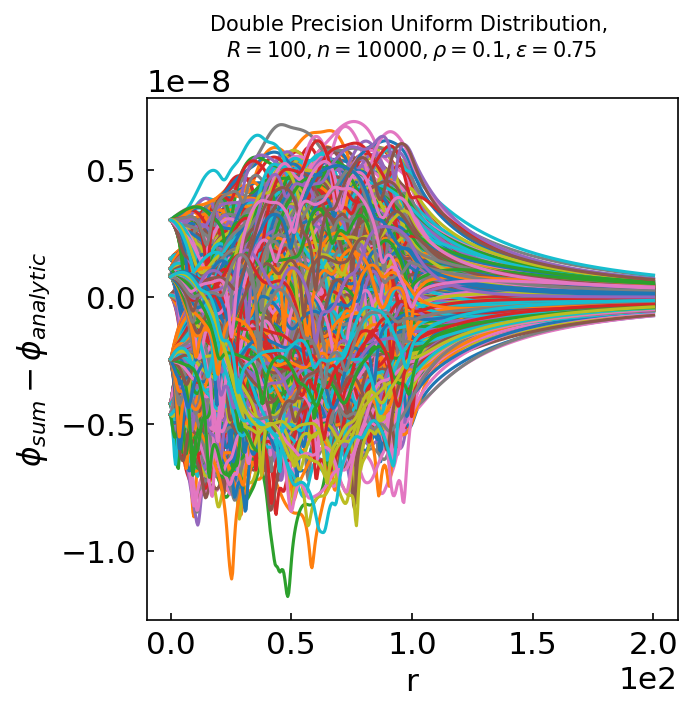

In [15]:
for x,y in zip(meta_xs,meta_ys):
    plt.plot(x,y)
plt.ylabel(r"$\phi_{sum} - \phi_{analytic}$")
plt.xlabel("r")
plt.ticklabel_format(axis="both",style="sci",scilimits=(0,0))
plt.title(title,pad=20,size=10)
plt.tight_layout()
plt.savefig(name + "_rayplot.jpg")
plt.show()

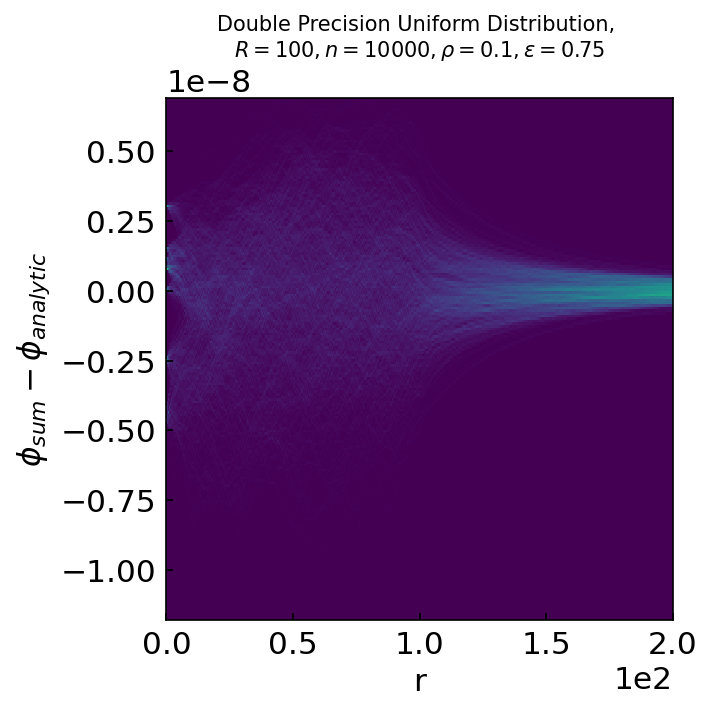

In [16]:
H,xedges,yedges = np.histogram2d(xs,ys,bins=[int(ray_steps),200],density=True)
H = H.T
X, Y = np.meshgrid(xedges, yedges)
plt.pcolormesh(X, Y, H)
plt.xlabel("r")
plt.ticklabel_format(axis="both",style="sci",scilimits=(0,0))
plt.ylabel(r"$\phi_{sum} - \phi_{analytic}$")
plt.title(title,pad=20,size=10)
plt.tight_layout()
plt.savefig(name + "_2dhistogram.jpg")
plt.show()

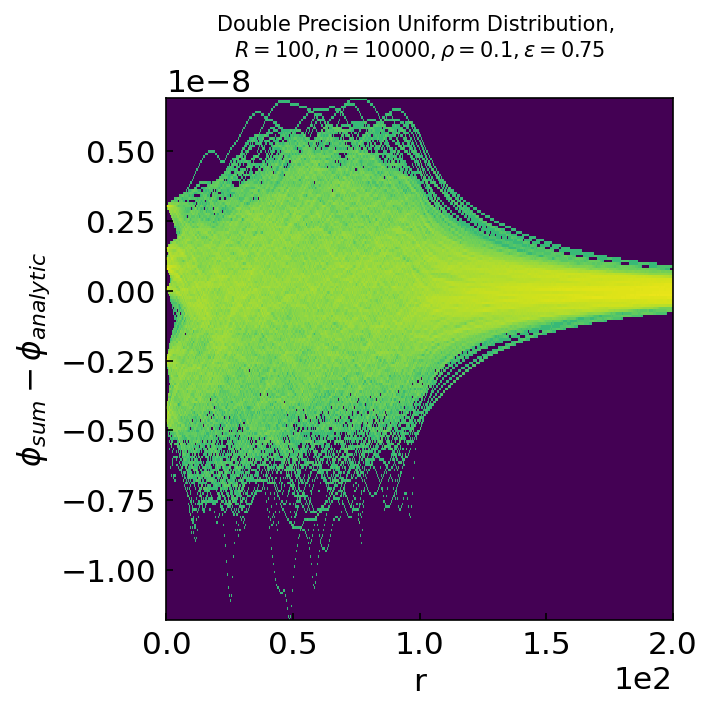

In [17]:
H,xedges,yedges = np.histogram2d(xs,ys,bins=[int(ray_steps),200],density=True)
H = H.T
H = np.log10(H + 1)
X, Y = np.meshgrid(xedges, yedges)
plt.pcolormesh(X, Y, H)
plt.xlabel("r")
plt.ticklabel_format(axis="both",style="sci",scilimits=(0,0))
plt.ylabel(r"$\phi_{sum} - \phi_{analytic}$")
plt.title(title,pad=20,size=10)
plt.tight_layout()
plt.savefig(name + "_2dhistogramlog.jpg")
plt.show()

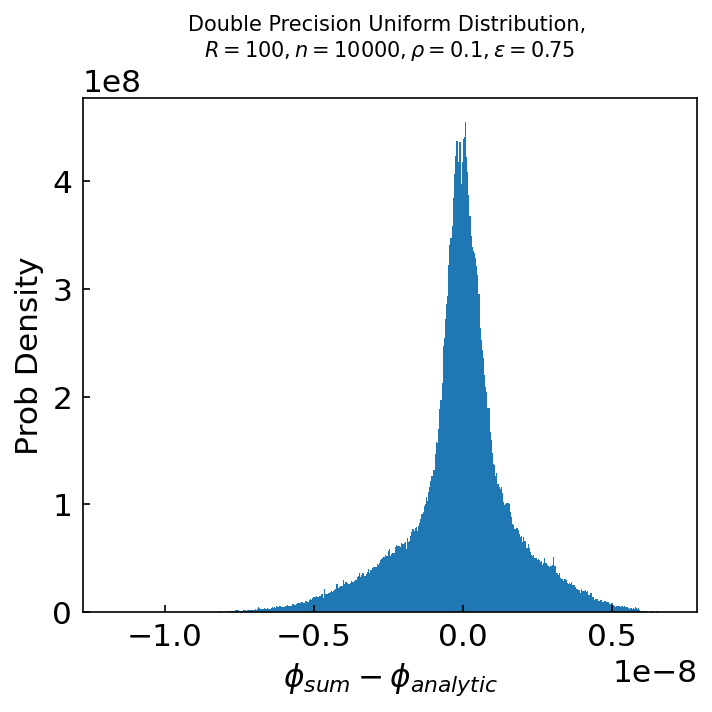

In [18]:
plt.hist(ys,bins=500,density=True)
plt.xlabel(r"$\phi_{sum} - \phi_{analytic}$")
plt.ylabel("Prob Density")
plt.ticklabel_format(axis="both",style="sci",scilimits=(0,0))
plt.title(title,pad=20,size=10)
plt.tight_layout()
plt.savefig(name + "_histogram.jpg")
plt.show()

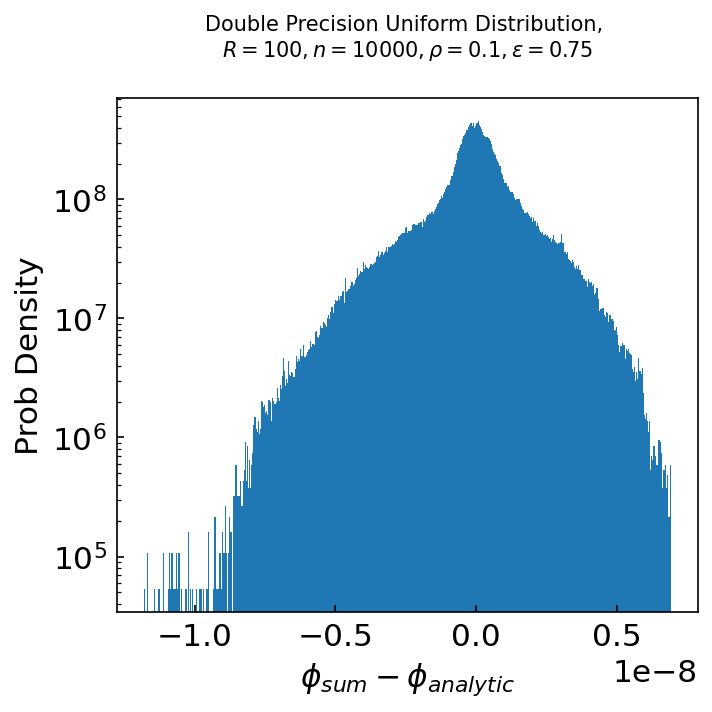

In [19]:
plt.hist(ys,bins=500,density=True)
plt.yscale('log')
plt.ticklabel_format(axis="x",style="sci",scilimits=(0,0))
plt.xlabel(r"$\phi_{sum} - \phi_{analytic}$")
plt.ylabel("Prob Density")
plt.title(title,pad=20,size=10)
plt.tight_layout()
plt.savefig(name + "_histogramlog.jpg")
plt.show()